# Visualization

Visualizing the results from the [notebook.ipynb](./notebook.ipynb) where Machine Learning models were trained and evaluated.

In [1]:
from utils.utils import Pickler

import matplotlib.pyplot as plt
import numpy as np

## Data

In [2]:
filename = './data/metrics.pkl'
results = Pickler(filename).load()

In [3]:
print(results.keys())

dict_keys(['linear_regression', 'ridge_regression', 'lasso_regression', 'decision_tree_regressor', 'random_forest_regressor', 'svr', 'k_neighbors_regressor'])


# Scores

In [4]:
r2_scores = {'train': {}, 'test': {}}
rmse_scores = {'train': {}, 'test': {}}

for model in results:
    if model not in r2_scores['train']:
        r2_scores['train'][model] = results[model]['train_metrics']['R^2']
        r2_scores['test'][model] = results[model]['test_metrics']['R^2']
        rmse_scores['train'][model] = results[model]['train_metrics']['RMSE']
        rmse_scores['test'][model] = results[model]['test_metrics']['RMSE']

print(r2_scores)
print(rmse_scores)

{'train': {'linear_regression': 0.9999895101599807, 'ridge_regression': 0.999989510157967, 'lasso_regression': 0.9965401331135292, 'decision_tree_regressor': 0.9997428532483232, 'random_forest_regressor': 0.9963658215417415, 'svr': 0.8800675081230452, 'k_neighbors_regressor': 0.9999961882690026}, 'test': {'linear_regression': 0.9999925942960032, 'ridge_regression': 0.9999925936723051, 'lasso_regression': 0.9947597136709089, 'decision_tree_regressor': 0.9874123053627375, 'random_forest_regressor': 0.9875097908694547, 'svr': 0.8378859615005159, 'k_neighbors_regressor': 0.9837584664112851}}
{'train': {'linear_regression': 0.02377438949253584, 'ridge_regression': 0.023774391774457733, 'lasso_regression': 0.4317721598646461, 'decision_tree_regressor': 0.11771056988679447, 'random_forest_regressor': 0.4425150705659095, 'svr': 2.5421043256546927, 'k_neighbors_regressor': 0.014331315697043101}, 'test': {'linear_regression': 0.02073622163773216, 'ridge_regression': 0.020737094807235356, 'lasso_

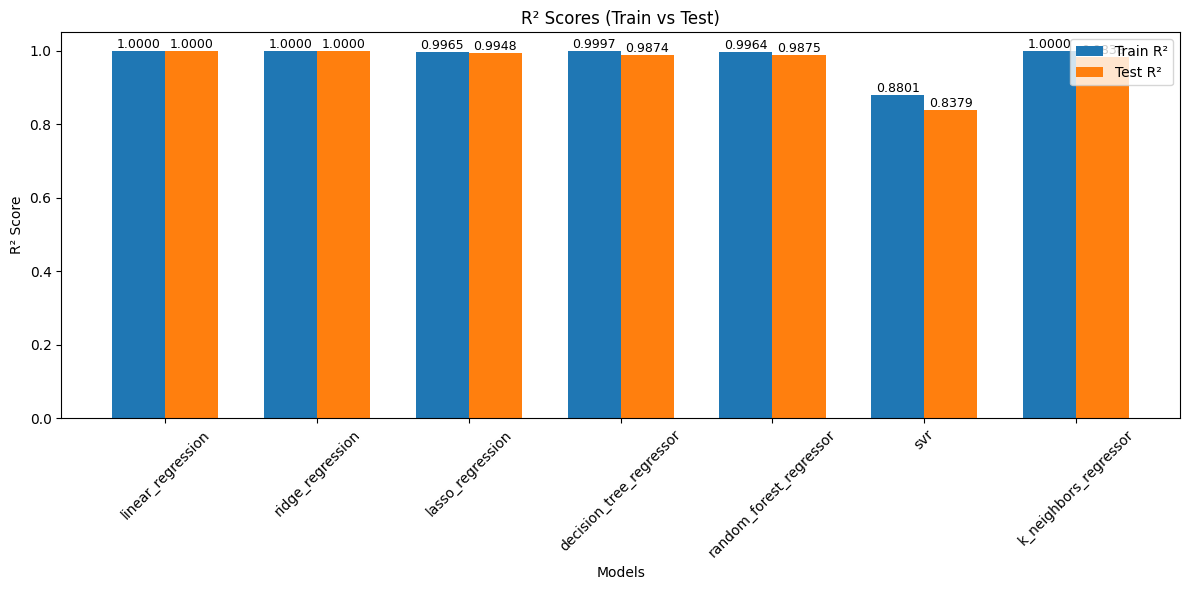

In [5]:
models = list(r2_scores['train'].keys())
x = np.arange(len(models))
width = 0.35

train_r2 = list(r2_scores['train'].values())
test_r2 = list(r2_scores['test'].values())

plt.figure(figsize=(12, 6))
plt.title('R² Scores (Train vs Test)')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.xticks(x, models, rotation=45)

bars1 = plt.bar(x - width/2, train_r2, width, label='Train R²')
bars2 = plt.bar(x + width/2, test_r2, width, label='Test R²')

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}',
                 ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.savefig('./image/r2_scores.png')
plt.show()

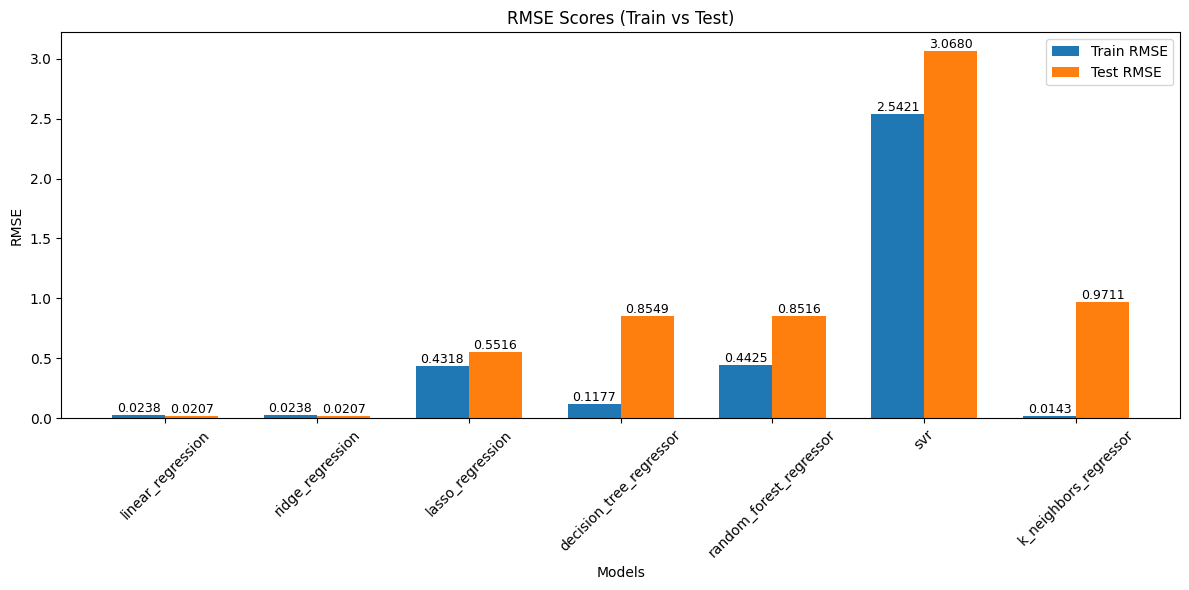

In [6]:
train_rmse = list(rmse_scores['train'].values())
test_rmse = list(rmse_scores['test'].values())

plt.figure(figsize=(12, 6))
plt.title('RMSE Scores (Train vs Test)')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(x, models, rotation=45)

bars1 = plt.bar(x - width/2, train_rmse, width, label='Train RMSE')
bars2 = plt.bar(x + width/2, test_rmse, width, label='Test RMSE')

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:,.4f}',
                 ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.savefig('./image/rmse_scores.png')
plt.show()